In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
data = pd.DataFrame(pd.read_csv("african_crises.csv"))

In [158]:
X = data[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises']]

Y = data['banking_crisis']

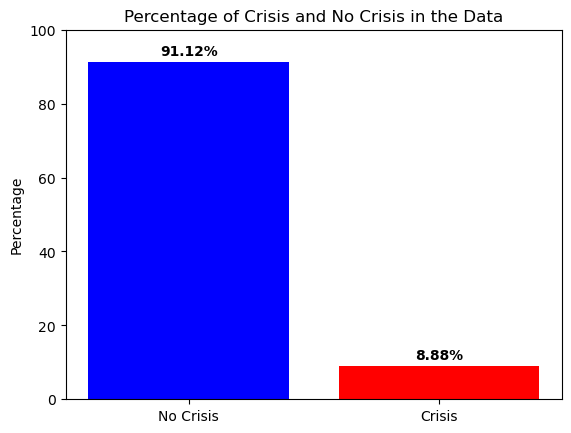

<Figure size 640x480 with 0 Axes>

In [159]:
import matplotlib.pyplot as plt

count_no_crisis = len(data[Y=='no_crisis'])
count_crisis = len(data[Y=='crisis'])
pct_of_no_crisis = count_no_crisis / (count_no_crisis + count_crisis)
pct_of_crisis = count_crisis / (count_no_crisis + count_crisis)

labels = ['No Crisis', 'Crisis']
percentages = [pct_of_no_crisis * 100, pct_of_crisis * 100]

plt.bar(labels, percentages, color=['blue', 'red'])
plt.ylabel('Percentage')
plt.title('Percentage of Crisis and No Crisis in the Data')
plt.ylim(0, 100)

for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.show()
plt.savefig('grapheee.png', dpi=300, bbox_inches='tight')

In [160]:
plt.savefig('graph.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [162]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

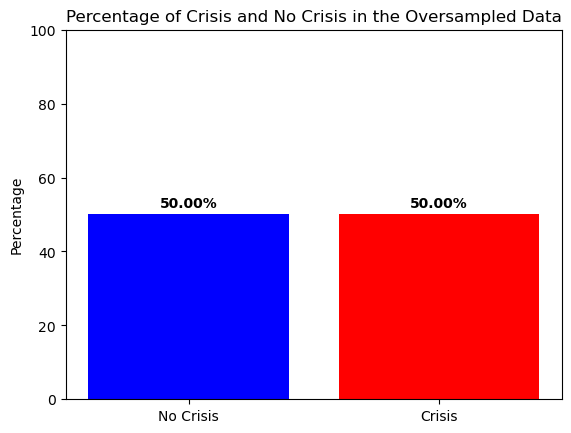

In [163]:
count_no_crisis = len(Y_resampled[Y_resampled == 'no_crisis'])
count_crisis = len(Y_resampled[Y_resampled == 'crisis'])

pct_of_no_crisis = count_no_crisis / (count_no_crisis + count_crisis) * 100
pct_of_crisis = count_crisis / (count_no_crisis + count_crisis) * 100

labels = ['No Crisis', 'Crisis']
percentages = [pct_of_no_crisis, pct_of_crisis]

plt.bar(labels, percentages, color=['blue', 'red'])
plt.ylabel('Percentage')
plt.title('Percentage of Crisis and No Crisis in the Oversampled Data')
plt.ylim(0, 100)

for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.savefig('graphee2e.png', dpi=300, bbox_inches='tight')
plt.show()

In [164]:
Y_resampled = pd.get_dummies(Y_resampled)
Y_resampled = Y_resampled.drop(['no_crisis'], axis=1)
Y_test = pd.get_dummies(Y_test)
Y_test = Y_test.drop(['no_crisis'], axis=1)

C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8333333333333334
Confusion Matrix:
[[252  33]
 [ 20  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       285
           1       0.28      0.39      0.33        33

    accuracy                           0.83       318
   macro avg       0.60      0.64      0.62       318
weighted avg       0.86      0.83      0.85       318



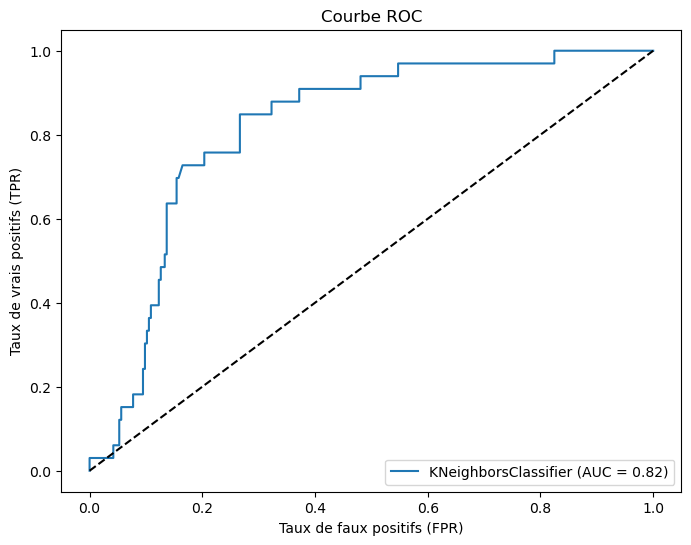

In [165]:
from sklearn.svm import SVC


# Create an instance of SVC (Support Vector Classifier)
svm = SVC(probability=True)

# Fit the SVM model to the training data
svm.fit(X_resampled, Y_resampled)

# Predict the labels for the test data
Y_pred = svm.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
classification_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report)

Y_probs = svm.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNeighborsClassifier (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [128]:
from sklearn.neighbors import KNeighborsClassifier

Y_resampled = np.ravel(Y_resampled)
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the KNN model to the training data
knn.fit(X_resampled, Y_resampled)

# Predict the labels for the test data
Y_pred = knn.predict(X_test)



Accuracy: 0.8805031446540881
Confusion Matrix:
[[259  26]
 [ 12  21]]


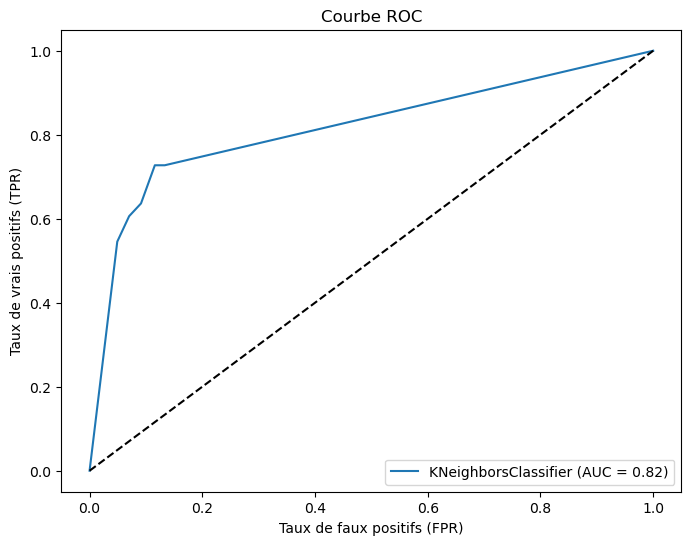

In [129]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

Y_probs = knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNeighborsClassifier (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [118]:
classification_report(Y_test, Y_pred, labels=[1,0],sample_weight=None, normalize=None)

TypeError: 'str' object is not callable